# ASTRO 533 - Project 5

**Created:** Oct. 2020   
**Last Edit:** Oct. 2020  

**Author:** Bill Chen  
**Email:** ybchen@umich.edu  

## Load packages and read data

In [40]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from astropy.table import Table as tb
import astropy.coordinates as coord
import astropy.units as u
from astropy.units import cds
import copy
plt.style.use('bill')

my_YlGnBu = copy.copy(mpl.cm.get_cmap('YlGnBu')) # copy the default cmap
my_YlGnBu.set_bad('w')

my_magma = copy.copy(mpl.cm.get_cmap('magma'))
my_magma.set_bad(my_magma(-1))

gaiarv_cat = tb.read('./glt13_kin.fits', format='fits')

## Get dynamics

In [2]:
samp = gaiarv_cat[np.where(gaiarv_cat['parallax']>10)] # dist < 100 pc

n_samp = len(samp)
print('Number of candidates:', n_samp)

Number of candidates: 65672


In [3]:
dist = coord.Distance(parallax=u.Quantity(samp['parallax']))
c = coord.SkyCoord(ra=samp['ra'],
                   dec=samp['dec'],
                   distance=dist,
                   pm_ra_cosdec=samp['pmra'],
                   pm_dec=samp['pmdec'],
                   radial_velocity=samp['radial_velocity'])

coord.Galactocentric()
galcen = c.transform_to(coord.Galactocentric(z_sun=15.3*u.pc,
                                             galcen_distance=8.18*u.kpc,
                                             galcen_v_sun=coord.CartesianDifferential(np.array([11.1,250.1,7.25]),unit=u.kilometer/u.second)))

samp['d'] = 1000*u.pc*u.mas / (samp['parallax']) # distance in pc
samp['absmag'] = samp['phot_g_mean_mag'] - 5*np.log10(samp['d']/10) # absolute magnitude

In [4]:
# velocities and dispersions
# bined by color

bins = 50
edges = np.linspace(0, 3, bins+1)

color = (edges[1:] + edges[:-1]) / 2
vx = np.zeros(bins)
vy = np.zeros(bins)
vz = np.zeros(bins)
sx = np.zeros(bins)
sy = np.zeros(bins)
sz = np.zeros(bins)
for i in range(bins):
    ind_temp, = np.where( (samp['bp_rp'] > edges[i]) & (samp['bp_rp'] < edges[i+1]) )
    vx[i] = np.mean(galcen[ind_temp].v_x.value)
    vy[i] = np.mean(galcen[ind_temp].v_y.value)
    vz[i] = np.mean(galcen[ind_temp].v_z.value)
    sx[i] = np.std(galcen[ind_temp].v_x.value, ddof=1)
    sy[i] = np.std(galcen[ind_temp].v_y.value, ddof=1)
    sz[i] = np.std(galcen[ind_temp].v_z.value, ddof=1)

c:\users\bill\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\bill\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\bill\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\bill\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
c:\users\bill\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [5]:
# velocities and dispersions
# bined by number

bins = 40
edges = np.linspace(0, n_samp-1, bins+1)
edges = edges.astype(np.int)

ind_color = np.argsort(samp['bp_rp'])

color = np.zeros(bins)
vx = np.zeros(bins)
vy = np.zeros(bins)
vz = np.zeros(bins)
sx = np.zeros(bins)
sy = np.zeros(bins)
sz = np.zeros(bins)

for i in range(bins):
    color[i] = np.mean(samp['bp_rp'][ind_color[edges[i]:edges[i+1]]])
    vx[i] = np.mean(galcen[ind_color[edges[i]:edges[i+1]]].v_x.value)
    vy[i] = np.mean(galcen[ind_color[edges[i]:edges[i+1]]].v_y.value)
    vz[i] = np.mean(galcen[ind_color[edges[i]:edges[i+1]]].v_z.value)
    sx[i] = np.std(galcen[ind_color[edges[i]:edges[i+1]]].v_x.value, ddof=1)
    sy[i] = np.std(galcen[ind_color[edges[i]:edges[i+1]]].v_y.value, ddof=1)
    sz[i] = np.std(galcen[ind_color[edges[i]:edges[i+1]]].v_z.value, ddof=1)

## CMD

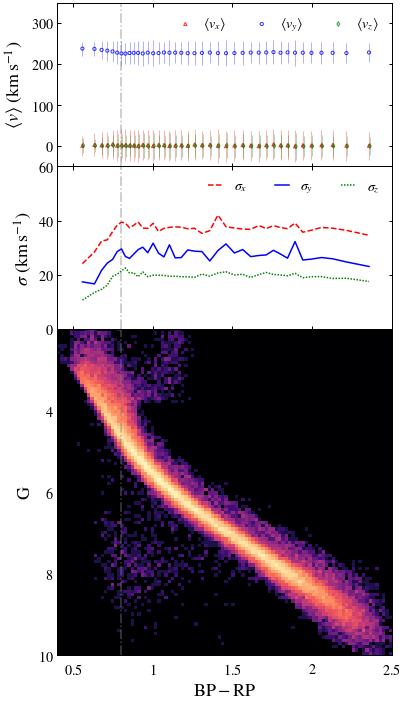

In [41]:
# plot parameters
x_min, x_max = 0.4, 2.5
y_min, y_max = 2, 10

# plot
# fig, [ax2,ax1] = plt.subplots(2, 1, figsize=(6,12), sharex=True)

fig = plt.figure(figsize=(6,12))
ax1 = plt.subplot2grid((4, 1), (2, 0), rowspan=2)
ax2 = plt.subplot2grid((4, 1), (0, 0))
ax3 = plt.subplot2grid((4, 1), (1, 0))
fig.subplots_adjust(hspace=0)

ax1.axvline(0.8, c='gray', ls='-.', alpha=0.5)
ax1.hist2d(samp['bp_rp'], samp['absmag'], range=[[x_min, x_max], [y_min, y_max]],
          bins = 100, norm=mcolors.LogNorm(), cmap=my_magma)

ax1.set_xlabel(r'$\mathrm{BP-RP}$')
ax1.set_ylabel(r'$\mathrm{G}$')
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_max, y_min)
ax1.set_xticks([0.5, 1, 1.5, 2, 2.5])
ax1.set_xticklabels([r'$0.5$', r'$1$', r'$1.5$', r'$2$', r'$2.5$'])
ax1.set_yticks([2, 4, 6, 8, 10])
ax1.set_yticklabels(['', r'$4$', r'$6$', r'$8$', r'$10$'])

# velocity
ax2.axvline(0.8, c='gray', ls='-.', alpha=0.5)

# errorbar style
ax2.scatter(color, vx, marker='^', edgecolors='r', facecolor='', alpha=0.8, s=10, label=r'$\left<v_x\right>$')
ax2.scatter(color, vy, marker='o', edgecolors='b', facecolor='', alpha=0.8, s=10, label=r'$\left<v_y\right>$')
ax2.scatter(color+0.005, vz, marker='d', edgecolors='g', facecolor='', alpha=0.8, s=10, label=r'$\left<v_z\right>$')

ax2.errorbar(color, vx, sx, c='r', fmt='none', alpha=0.3, lw=1, label=None)
ax2.errorbar(color, vy, sy, c='b', fmt='none', alpha=0.3, lw=1, label=None)
ax2.errorbar(color+0.005, vz, sy, c='g', fmt='none', alpha=0.3, lw=1, label=None)

# shade style
# ax2.plot(color, vx, c='r', ls='--', label=r'$\left<v_x\right>$')
# ax2.plot(color, vy, c='b', ls='-', label=r'$\left<v_y\right>$')
# ax2.plot(color, vz, c='g', ls=(0,(1,1)), label=r'$\left<v_z\right>$')

# ax2.fill_between(color, vx-sx, vx+sx, alpha = 0.3, facecolor='r', edgecolor=None, label=None)
# ax2.fill_between(color, vy-sy, vy+sy, alpha = 0.3, facecolor='b', edgecolor=None, label=None)
# ax2.fill_between(color, vz-sz, vz+sz, alpha = 0.3, facecolor='g', edgecolor=None, label=None)

ax2.set_ylabel(r'$\left<v\right>\ (\mathrm{km\,s^{-1}})$')
ax2.set_xlim(x_min, x_max)
ax2.set_ylim(-50, 350)
ax2.set_xticks([0.5, 1, 1.5, 2, 2.5])
ax2.set_xticklabels([])
ax2.set_yticks([0, 100, 200, 300])
ax2.set_yticklabels([r'$0$', r'$100$', r'$200$', r'$300$'])
ax2.legend(ncol=3, loc=1)

# dispersion
ax3.axvline(0.8, c='gray', ls='-.', alpha=0.5)

ax3.plot(color, sx, c='r', ls='--', label=r'$\sigma_x$')
ax3.plot(color, sy, c='b', ls='-', label=r'$\sigma_y$')
ax3.plot(color, sz, c='g', ls=(0,(1,1)), label=r'$\sigma_z$')

ax3.set_ylabel(r'$\sigma\ (\mathrm{km\,s^{-1}})$')
ax3.set_xlim(x_min, x_max)
ax3.set_ylim(0, 60)
ax3.set_xticks([0.5, 1, 1.5, 2, 2.5])
ax3.set_xticklabels([])
ax3.set_yticks([0, 20, 40, 60])
ax3.set_yticklabels([r'$0$', r'$20$', r'$40$', r'$60$'])
ax3.legend(ncol=3, loc=1)

plt.savefig('./figures/cmd.pdf')
plt.show()

## $v$-$s^2$ relation

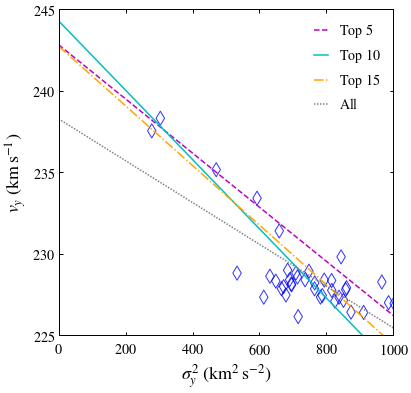

In [57]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(sy**2, vy, marker='d', edgecolors='b', facecolor='', alpha=0.8, s=100)
p10 = np.poly1d(np.polyfit(sy[:10]**2, vy[:10], 1))
p5 = np.poly1d(np.polyfit(sy[:5]**2, vy[:5], 1))
p15 = np.poly1d(np.polyfit(sy[:15]**2, vy[:15], 1))
pall = np.poly1d(np.polyfit(sy**2, vy, 1))
ax.plot([0, 1000], [p5(0), p5(1000)], c='m', ls='--', label=r'$\mathrm{Top\ 5}$')
ax.plot([0, 1000], [p10(0), p10(1000)], c='c', ls='-', label=r'$\mathrm{Top\ 10}$')
ax.plot([0, 1000], [p15(0), p15(1000)], c='orange', ls='-.', label=r'$\mathrm{Top\ 15}$')
ax.plot([0, 1000], [pall(0), pall(1000)], c='gray', ls=(0,(1,1)), label=r'$\mathrm{All}$')

ax.set_xlabel(r'$\sigma_y^2\ (\mathrm{km^2\,s^{-2}})$')
ax.set_ylabel(r'$v_y\ (\mathrm{km\,s^{-1}})$')
ax.set_xlim(0, 1000)
ax.set_ylim(225, 245)
ax.set_xticks([0, 200, 400, 600, 800, 1000])
ax.set_xticklabels([r'$0$', r'$200$', r'$400$', r'$600$', r'$800$', r'$1000$'])
ax.set_yticks([225, 230, 235, 240, 245])
ax.set_yticklabels([r'$225$', r'$230$', r'$235$', r'$240$', r'$245$'])
ax.legend()

plt.savefig('./figures/v_s.pdf')
plt.show()

In [67]:
vc = p10(0) * u.km / u.s
print('estimated vc: ', vc)

R0 = 8.18 * u.kpc
M_R0 = vc**2 * R0 / cds.G
print('enclosed mass: ', M_R0.to(cds.Msun))

estimated vc:  244.2860285312157 km / s
enclosed mass:  113498330403.57202 Msun


## $v_y$-$x$ relation

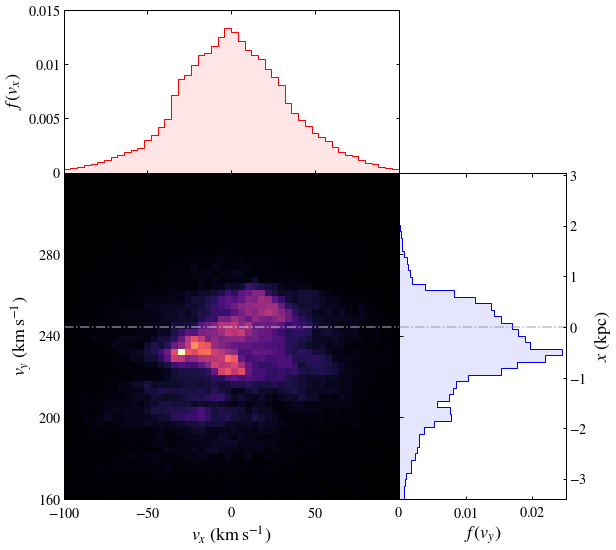

In [55]:
fig = plt.figure(figsize=(9,9))
ax1 = plt.subplot2grid((3, 3), (1, 0), rowspan=2, colspan=2)
ax2 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
fig.subplots_adjust(hspace=0, wspace=0)

# ax1.hist2d(galcen.v_x.value, galcen.v_y.value, range=[[-200, 200], [50, 350]],
#            bins=50, norm=mcolors.LogNorm(), cmap=my_YlGnBu)
ax1.hist2d(galcen.v_x.value, galcen.v_y.value, range=[[-100, 100], [160, 320]],
           bins=50, cmap=my_magma)

ax1.axhline(vc, c='w', ls='-.', alpha=0.5)

ax1.set_xlabel(r'$v_x\ (\mathrm{km\,s^{-1}})$')
ax1.set_ylabel(r'$v_y\ (\mathrm{km\,s^{-1}})$')
ax1.set_xlim(-100, 100)
ax1.set_ylim(160, 320)
ax1.set_xticks([-100, -50, 0, 50, 100])
ax1.set_xticklabels([r'$-100$', r'$-50$', r'$0$', r'$50$', ''])
ax1.set_yticks([160, 200, 240, 280, 320])
ax1.set_yticklabels([r'$160$', r'$200$', r'$240$', r'$280$', ''])

# f(vx)
ax2.hist(galcen.v_x.value, bins=50, range=[-100, 100], density=True, orientation='vertical', histtype='stepfilled',
         color='r', alpha=0.1, label=None)
ax2.hist(galcen.v_x.value, bins=50, range=[-100, 100], density=True, orientation='vertical', histtype='step',
         linewidth=1, color='r', label=None)

ax2.set_ylabel(r'$f\,(v_x)$')

ax2.set_xlim(-100, 100)
ax2.set_ylim(0, 0.015)
ax2.set_xticks([-100, -50, 0, 50, 100])
ax2.set_xticklabels([])
ax2.set_yticks([0, 0.005, 0.01, 0.015])
ax2.set_yticklabels([r'$0$', r'$0.005$', r'$0.01$', r'$0.015$'])

# f(vy)
ax3.hist(galcen.v_y.value, bins=50, range=[160, 320], density=True, orientation='horizontal', histtype='stepfilled',
         color='b', alpha=0.1, label=None)
ax3.hist(galcen.v_y.value, bins=50, range=[160, 320], density=True, orientation='horizontal', histtype='step',
         linewidth=1, color='b', label=None)

ax3.axhline(vc, c='gray', ls='-.', alpha=0.5)

ax3.set_xlabel(r'$f\,(v_y)$')
ax3.set_xlim(0, 0.025)
ax3.set_ylim(160, 320)
ax3.set_xticks([0, 0.01, 0.02])
ax3.set_xticklabels([r'$0$', r'$0.01$', r'$0.02$'])
ax3.set_yticks([160, 200, 240, 280, 320])
ax3.set_yticklabels([])

B = 12.4
secax3 = ax3.twinx()
secax3.set_ylabel(r'$x\ (\mathrm{kpc})$')
secax3.set_ylim((160-vc)/B/2, (320-vc)/B/2)
secax3.set_yticks([-3, -2, -1, 0, 1, 2, 3])
secax3.set_yticklabels([r'$-3$', r'$-2$', r'$-1$', r'$0$', r'$1$', r'$2$', r'$3$'])

plt.savefig('./figures/v_v.pdf')
plt.show()